In [4]:
# !pip install Cython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.3/987.3 kB 1.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [120]:
# !pip install pymorphy2

  Using cached pymorphy2-0.9.1-py3-none-any.whl (55 kB)
  Using cached DAWG_Python-0.7.2-py2.py3-none-any.whl (11 kB)
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached pymorphy2_dicts_ru-2.4.417127.4579844-py2.py3-none-any.whl (8.2 MB)


In [128]:
!pip install "tqdm>=4.9.0"

In [5]:
# !pip install fasttext==0.6.0

  Using cached fasttext-0.6.0.tar.gz (57 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fasttext: filename=fasttext-0.6.0-cp310-cp310-macosx_10_9_universal2.whl size=205718 sha256=e418d441df760d7961cee6c7b4a5d30d02e68f73be2d7a9a66feb02cf566e96c
  Stored in directory: /Users/buchkovv/Library/Caches/pip/wheels/d1/27/e9/355ddd858916c673b2bb4863938bb8ced0a30da2bf59eef646
Successfully built fasttext


In [1]:
# !git clone https://github.com/facebookresearch/fastText.git
# !cd fastText
# !pip install fastText

fatal: destination path 'fastText' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 695.5 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fastText: filename=fasttext-0.9.2-cp310-cp310-macosx_13_0_universal2.whl size=652139 sha256=0abf5605bfb2c8c2324e633910b7669b00697c99aabfad3c393e4ae96fe02d04
  Stored in directory: /Users/buchkovv/Library/Caches/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fastText


In [1]:
import os

import numpy as np
import pandas as pd

In [2]:
import fasttext
import fasttext.util

In [3]:
help(fasttext.util.download_model)

Help on function download_model in module fasttext.util.util:

download_model(lang_id, if_exists='strict', dimension=None)
    Download pre-trained common-crawl vectors from fastText's website
    https://fasttext.cc/docs/en/crawl-vectors.html



In [4]:
# fasttext.util.download_model('ru', if_exists='ignore')
ft = fasttext.load_model('cc.ru.300.bin')

In [5]:
ft['привет']

array([ 0.06434693, -0.01527086, -0.06963537, -0.03582602,  0.01471584,
       -0.03503159,  0.02701715,  0.04161827, -0.00033126,  0.00355259,
        0.06979205,  0.06205348,  0.05154078,  0.03831509, -0.02394784,
       -0.03954181, -0.00189653, -0.11174394, -0.0407712 ,  0.09289949,
       -0.07412342, -0.05209147,  0.02017231,  0.04837443,  0.02212641,
        0.00856511, -0.03055364,  0.04733564,  0.04380886,  0.03856769,
        0.03442968,  0.05576854,  0.01513439,  0.14055566,  0.03365337,
       -0.02920472, -0.10305687, -0.09332671,  0.03085899, -0.11067575,
       -0.08992791,  0.05850704, -0.017424  ,  0.00120653, -0.07153153,
        0.10312843, -0.08066262, -0.00642456,  0.04408539, -0.05728461,
       -0.0179531 ,  0.03936698,  0.04778077, -0.04907751, -0.00909553,
        0.05588715, -0.00236535,  0.04878682, -0.01769035,  0.03295048,
        0.00906604,  0.08772802,  0.02970458, -0.04903899, -0.03025401,
       -0.04151824,  0.04931813, -0.02804473,  0.05716789,  0.03

In [172]:
from gensim.models import word2vec

def get_tweet_embedding(lemmas, model, embedding_size=300):
    
    res = np.zeros(embedding_size)
    cnt = 0
    for word in lemmas.split():
        if word in model:
            res += np.array(model[word])
            cnt += 1
    if cnt:
        res = res / cnt
    return res

In [9]:
x = 'привет всем слушателям курса'
get_tweet_embedding(x, model=ft, embedding_size=300)

array([ 2.84749218e-02,  1.14055865e-02, -1.54750008e-02,  6.10717852e-03,
       -5.42343501e-03,  2.83443742e-03,  2.40256451e-03,  1.29073053e-02,
        3.05031866e-02, -1.99234379e-02,  6.13203850e-02,  4.42768331e-02,
        2.71531800e-02, -1.02064133e-02,  9.22483567e-04,  2.50384058e-02,
       -1.25383004e-02, -4.89095808e-02, -3.07890818e-02,  1.01918663e-01,
       -2.85800546e-02, -1.05811988e-01, -1.28629373e-02,  2.95597422e-02,
        2.13206490e-03,  1.26906892e-02, -2.97227059e-02,  2.77029723e-02,
       -1.21254625e-02, -4.76178443e-02, -6.68591424e-03,  3.05985650e-02,
        3.59081652e-02,  1.02970391e-01,  3.62780495e-02, -5.56655712e-02,
       -1.11200343e-01, -1.16946280e-01,  4.69890856e-02, -5.79430675e-02,
       -4.56299540e-03, -2.32621958e-03, -2.30524363e-03,  1.96370891e-02,
       -1.68996924e-02,  4.77626729e-02, -7.71877861e-02,  2.95996453e-02,
        3.40769021e-02, -3.43663241e-02,  5.55797149e-02,  1.05126291e-02,
        9.77615127e-03,  

In [10]:
BACKTEST_CCY = 'USDRUB'
BACKTEST_DAYS = 5

PATH_TEXTS = 'data/telegram'
PATH_OPT_PNL = 'data/pnl'

In [11]:
# Get all available data_sources
sources = os.listdir(PATH_TEXTS)
sources

['cbonds.csv',
 'themovchans.csv',
 'headlines_QUANTS.csv',
 'War_Wealth_Wisdom.csv',
 'mmi.csv',
 'vts.csv',
 'signal.csv',
 '.gitignore',
 'rshb_invest.csv',
 'Alfa_Wealth.csv',
 'sky_bond.csv',
 'bitkogan.csv']

In [13]:
# Create target variable dataframe
pnl = pd.read_csv(f'{PATH_OPT_PNL}/Backtest_{BACKTEST_CCY}_{BACKTEST_DAYS}_days.txt')
pnl['date_start'] = pd.to_datetime(pnl['date_start']).dt.strftime('%Y-%m-%d')
pnl['pnl_sign'] = pnl['pnl'].apply(lambda x: 1 if x >= 0 else 0)
pnl

,date_start,pnl,pnl_sign
0,2021-01-04,291264.097914,1
1,2021-01-05,-411993.830320,0
2,2021-01-06,521491.686795,1
3,2021-01-08,62842.634116,1
4,2021-01-11,-537598.706217,0
...,...,...,...
245,2021-12-20,-407527.554561,0
246,2021-12-21,-176881.417077,0
247,2021-12-22,-206943.414418,0
248,2021-12-23,23073.596468,1


In [14]:
# Get balance of the sample
pnl['pnl_sign'].sum() / pnl.shape[0]

0.536

In [15]:
import datetime as dt
from typing import List, Tuple, Union


def _binary_search_by_date(array: List[Tuple[dt.datetime, float]], date_x: dt.datetime) -> Union[int, None]:
    """
    Searches for the index of date_x in the array via binary search.

        Parameters:
            array (list) : A sorted array of (date, float_value) tuples
            date_x (datetime.datetime) : Date to search for

        Returns:
            index_x (int): Index of the searched date in the array.
    """
    left = 0
    right = len(array) - 1

    while left <= right:
        mid = left + (right - left) // 2

        if array[mid - 1][0] <= date_x <= array[mid][0]:
            return mid
        elif date_x > array[mid - 1][0] and date_x > array[mid][0]:
            left = mid + 1
        else:
            right = mid - 1

    return None


def binary_search_time_series(time_series: List[Tuple[dt.datetime, float]], date_start: dt.datetime,
                              date_end: dt.datetime) -> Union[List[Tuple[dt.datetime, float]], None]:
    """
    Searches for the part of the time series that is contained inside [date_start; date_end] period via binary search.

        Parameters:
            time_series (list) : A sorted array of (date, float_value) tuples
            date_start (datetime.datetime) : Starting date of the searched period
            date_end (datetime.datetime) : Ending date of the searched period

        Returns:
            time_series_data (list): Part of the time series that is contained inside [date_start; date_end] period.
    """

    if date_start <= date_end:
        left_index = _binary_search_by_date(time_series, date_start)
        
        if left_index is None:
            return None
        
        right_index = _binary_search_by_date(time_series[left_index:], date_end)
        
        if right_index is None:
            return None
        
        right_index += left_index
    else:
        left_index = _binary_search_by_date(time_series, date_end)
        
        if left_index is None:
            return None
        
        right_index = _binary_search_by_date(time_series[left_index:], date_start)
        
        if right_index is None:
            return None
        
        right_index += left_index
    
    return time_series[left_index:right_index]

In [23]:
pnl_sign_ts = [(pd.to_datetime(row['date_start']).to_pydatetime(), row['pnl_sign']) for  _, row in pnl.iterrows()]
pnl_sign_ts

[(datetime.datetime(2021, 1, 4, 0, 0), 1),
 (datetime.datetime(2021, 1, 5, 0, 0), 0),
 (datetime.datetime(2021, 1, 6, 0, 0), 1),
 (datetime.datetime(2021, 1, 8, 0, 0), 1),
 (datetime.datetime(2021, 1, 11, 0, 0), 0),
 (datetime.datetime(2021, 1, 12, 0, 0), 0),
 (datetime.datetime(2021, 1, 13, 0, 0), 1),
 (datetime.datetime(2021, 1, 14, 0, 0), 1),
 (datetime.datetime(2021, 1, 15, 0, 0), 1),
 (datetime.datetime(2021, 1, 18, 0, 0), 1),
 (datetime.datetime(2021, 1, 19, 0, 0), 1),
 (datetime.datetime(2021, 1, 20, 0, 0), 1),
 (datetime.datetime(2021, 1, 21, 0, 0), 1),
 (datetime.datetime(2021, 1, 22, 0, 0), 1),
 (datetime.datetime(2021, 1, 25, 0, 0), 1),
 (datetime.datetime(2021, 1, 26, 0, 0), 0),
 (datetime.datetime(2021, 1, 27, 0, 0), 1),
 (datetime.datetime(2021, 1, 28, 0, 0), 1),
 (datetime.datetime(2021, 1, 29, 0, 0), 1),
 (datetime.datetime(2021, 2, 1, 0, 0), 0),
 (datetime.datetime(2021, 2, 2, 0, 0), 0),
 (datetime.datetime(2021, 2, 3, 0, 0), 0),
 (datetime.datetime(2021, 2, 4, 0, 0), 

In [98]:
# Generate dataframes
df = pd.DataFrame()

for s in sources:
    if s != '.gitignore':
        source_data = pd.read_csv(f'{PATH_TEXTS}/{s}')
        df = df.append(source_data)

df.head()

/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_81743/371081446.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(source_data)
/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_81743/371081446.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(source_data)
/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_81743/371081446.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(source_data)
/var/folders/sr/lzvmv9j54ks_jl4x99t250r00000gn/T/ipykernel_81743/371081446.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(source_data)
/var/folders/sr/lzvmv9j5

,id,date,text
0,9,2017-07-28T10:56:14,Cbonds.ru запустило канал в Telegram. Планиру...
1,10,2017-08-03T15:28:17,Облигационный бюллетень Cbonds – все данные о ...
2,11,2017-08-03T15:41:02,Cbonds prepared monthly report: CBONDS GLOBAL ...
3,12,2017-08-03T18:11:32,Дайджест Cbonds от 3 августа:«Группа Компаний...
4,13,2017-08-04T12:42:41,Совкомбанк открыл книгу заявок на вторичное ра...


In [99]:
# initial_date = pnl_sign_ts[0][0]

# for i, row in df.iterrows():
#     date_x = pd.to_datetime(row['date']).to_pydatetime()
#     pnl_sign_key = _binary_search_by_date(pnl_sign_ts, date_x)
    
#     if pnl_sign_key is not None and date_x >= initial_date:
#         df.loc[df.index[i], 'pnl_sign'] = pnl_sign_ts[_binary_search_by_date(pnl_sign_ts, date_x)][1]

In [102]:
initial_date = pnl_sign_ts[0][0]

def get_pnl_sign(row):
    date_x = pd.to_datetime(row['date']).to_pydatetime()
    pnl_sign_key = _binary_search_by_date(pnl_sign_ts, date_x)
    
    if pnl_sign_key is not None and date_x >= initial_date:
        return pnl_sign_ts[_binary_search_by_date(pnl_sign_ts, date_x)][1]

In [103]:
df['pnl_sign'] = df.apply(lambda row: get_pnl_sign(row), axis=1)
df.head()

,id,date,text,pnl_sign
0,9,2017-07-28T10:56:14,Cbonds.ru запустило канал в Telegram. Планиру...,NaN
1,10,2017-08-03T15:28:17,Облигационный бюллетень Cbonds – все данные о ...,NaN
2,11,2017-08-03T15:41:02,Cbonds prepared monthly report: CBONDS GLOBAL ...,NaN
3,12,2017-08-03T18:11:32,Дайджест Cbonds от 3 августа:«Группа Компаний...,NaN
4,13,2017-08-04T12:42:41,Совкомбанк открыл книгу заявок на вторичное ра...,NaN


In [104]:
df.dropna(subset=['pnl_sign'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,id,date,text,pnl_sign
0,6400,2021-01-05T09:39:18,УТРЕННИЙ ДАЙДЖЕСТ📈ИндексыCbonds-GBI RU YTM eff...,1.0
1,6401,2021-01-05T10:59:32,"⚡️Российские компании: основные события, 5 янв...",1.0
2,6402,2021-01-05T11:33:17,📉 Рубль после попыток роста перешел к снижению...,1.0
3,6405,2021-01-05T14:30:00,🎄🎧 Новогодний интерактив – Часть 2. Cbonds: П...,1.0
4,6406,2021-01-06T09:22:19,УТРЕННИЙ ДАЙДЖЕСТ📈ИндексыCbonds-GBI RU YTM eff...,1.0


In [105]:
X = df.drop(['id', 'date', 'pnl_sign'], axis=1)
y = df['pnl_sign']

In [106]:
X['text']

0        УТРЕННИЙ ДАЙДЖЕСТ📈ИндексыCbonds-GBI RU YTM eff...
1        ⚡️Российские компании: основные события, 5 янв...
2        📉 Рубль после попыток роста перешел к снижению...
3        🎄🎧  Новогодний интерактив – Часть 2. Cbonds: П...
4        УТРЕННИЙ ДАЙДЖЕСТ📈ИндексыCbonds-GBI RU YTM eff...
                               ...                        
12368    Путин анонсировал встречу между Россией и США ...
12369    В США ожидаемо одобрили пилюли от Pfizer  Добр...
12370    Если очень постараться, то в сочетании букв СП...
12371    По данным Росстата, промышленное производство ...
12372    Президент РФ Владимир Путин сегодня провел тра...
Name: text, Length: 12373, dtype: object

In [130]:
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

from functools import lru_cache
from tqdm.notebook import tqdm
from tqdm.gui import tqdm as tqdm_gui

m = MorphAnalyzer()
regex = re.compile("[а-яa-zёЁ]+")

def words_only(text, regex=regex):
    try:
        return regex.findall(text.lower())
    except:
        return []

@lru_cache(maxsize=128)
def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]

mystopwords = stopwords.words('russian') 
def remove_stopwords(lemmas, stopwords = mystopwords):
    return [w for w in lemmas if not w in stopwords and len(w) > 3]

def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)
    
    return ' '.join(remove_stopwords(lemmas))

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=121)

In [123]:
lemmas = list(tqdm(map(clean_text, X_train['text']), total=len(X_train)))

X_train['lemmas'] = lemmas
X_train.sample(5)

  0%|          | 0/9898 [00:00<?, ?it/s]

,text,lemmas
4774,ОБРАЩЕНИЯ ЗА ПОСОБИЯМИ ПО БЕЗРАБОТИЦЕ В США – ...,обращение пособие безработица менее полмиллион...
8322,Завтрак с РСХБ Инвестиции 27.10.2021 читайте н...,завтрак рсхб инвестиция читать ниже ссылка
2409,#Cbonds_Review 📈🧑🏻‍💻 Как инвестору в облигации...,cbonds review инвестор облигация защититься ин...
12303,Несколько слов о рынках .Вчера получил множест...,несколько слово рынок вчера получить множество...
2072,🏦 Книга заявок по облигациям Сбербанка серии 0...,книга заявка облигация сбербанк серия sber объ...


In [124]:
lemmas_val = list(tqdm(map(clean_text, X_val['text']), total=len(X_val)))

X_val['lemmas'] = lemmas_val

  0%|          | 0/2475 [00:00<?, ?it/s]

In [125]:
X_train.shape

(9898, 2)

In [131]:
tqdm.pandas()
X_train['embedding'] = X_train['lemmas'].progress_apply(lambda x: get_tweet_embedding(x, model=ft))
print('train done')

  0%|                    | 0/9898 [00:00<?, ?it/s]

train done


  0%|                    | 0/2475 [00:00<?, ?it/s]

In [132]:
# tqdm.pandas()
# X_val['embedding'] = X_val['lemmas'].progress_apply(lambda x: get_tweet_embedding(x, model=ft))

  0%|                    | 0/2475 [00:00<?, ?it/s]

In [143]:
train_embedding = np.array(list(X_train['embedding'].values))
val_embedding = np.array(list(X_val['embedding'].values))

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=12)
clf.fit(train_embedding, y_train)
clf.score(train_embedding, y_train)

0.5435441503334006

In [145]:
pred = clf.predict(val_embedding)
accuracy_score(pred, y_val)

0.5301010101010101

In [147]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=4, n_estimators=50)

rf.fit(train_embedding, y_train)
(y_val == rf.predict(val_embedding)).mean()

0.5103030303030303

In [149]:
import catboost as cb

np.random.seed(12)

params = dict(
    learning_rate=0.025,
    iterations=10000,
    reg_lambda=0.0005,
    colsample_bylevel=1.,
    max_bin=80,
    bagging_temperature=2,
    use_best_model=True,
    verbose=False,
    grow_policy='Depthwise',
    random_seed=12
)
model = cb.CatBoostClassifier(
    **params,
)

eval_set = cb.Pool(data=val_embedding, label=y_val)
model.fit(train_embedding, y_train, eval_set=eval_set, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [150]:
pred = model.predict(val_embedding)
accuracy_score(pred, y_val)

0.5438383838383838

In [155]:
lemmas = list(tqdm(map(clean_text, df['text']), total=len(df)))

df['lemmas'] = lemmas

  0%|          | 0/12373 [00:00<?, ?it/s]

In [156]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.2, random_state=12)

In [165]:
with open('train_ft.txt', 'w') as f:
    for label, lemmas in list(zip(
        y_train, X_train['lemmas']
    )):
        f.write(f"__label__{int(label)} {lemmas}\n")
        #print(f"__label__{int(label)} {lemmas}")

In [166]:
!tail train_ft.txt

__label__0 продолжать следить реакция мировой сообщество экстренный посадка рейс ryanair минск собранный комментарий запад лишь незначительный часть буря медиа пространство который подняться повод выразиться умник элегантный действие минск нива поимка враг режим лукашенко похоже дать элегантный история мочь душевно ударить экономика беларусь секрет многие лететь транзит минск хотеть попасть москва киев обратно данный транзит вообще транзитный поневоле тематика стать очень неплохой источник доход авиаотрасль беларусь соответственно экономика вероятность дать история белавиа мочь наступить непростой время судить последний заявление политик рада целое государство евросоюз мочь закрыться весь евросоюз лишь предположение сделать основа высказывание политический деятель горячий след произойти воскресение вечером интересно связь реакция киев вряд сильно отличаться реакция европа накрываться транзит говориться медный вообще экономика беларусь элегантный элегантный звездец bitkogan
__label__1 у

In [167]:
classifier = fasttext.train_supervised('train_ft.txt')

Read 0M words
Number of words:  27960
Number of labels: 2
Progress: 100.0% words/sec/thread: 2798046 lr:  0.000000 avg.loss:  0.689908 ETA:   0h 0m 0s


In [168]:
pred = classifier.predict(list(X_val['lemmas']))[0]
pred = [int(label[0][-1]) for label in pred]

accuracy_score(list(y_val), pred)

0.5385858585858586

In [170]:
tokenized_tweets = [tweet.split() for tweet in train['lemmas'].values]

%time w2v = word2vec.Word2Vec(tokenized_tweets, workers=4, vector_size=200, min_count=10, window=3, sample=1e-3)

CPU times: user 4.68 s, sys: 26.9 ms, total: 4.7 s
Wall time: 1.32 s


In [171]:
w2v.wv.most_similar(positive=['рост'], topn=10)

[('снижение', 0.8320657014846802),
 ('падение', 0.7674662470817566),
 ('возрасти', 0.7310284972190857),
 ('скачок', 0.7289108037948608),
 ('замедление', 0.724600076675415),
 ('восстановление', 0.7084911465644836),
 ('энергоноситель', 0.6922722458839417),
 ('увеличение', 0.6910353899002075),
 ('опережать', 0.6852946877479553),
 ('прирост', 0.6814692616462708)]

In [176]:
def get_tweet_embedding(lemmas, model=w2v.wv, embedding_size=200):
    
    res = np.zeros(embedding_size)
    cnt = 0
    for word in lemmas.split():
        if word in model:
            res += np.array(model[word])
            cnt += 1
    if cnt:
        res = res / cnt
    return res

In [177]:
X_train['w2v_embedding'] = X_train['lemmas'].map(get_tweet_embedding)
X_val['w2v_embedding'] = X_val['lemmas'].map(get_tweet_embedding)

In [179]:
train_w2v = list(X_train['w2v_embedding'].values)
val_w2v = list(X_val['w2v_embedding'].values)

In [180]:
clf = LogisticRegression(random_state=12, max_iter=500)
clf.fit(train_w2v, y_train)

pred = clf.predict(val_w2v)
accuracy_score(pred, y_val)

0.5317171717171717

In [181]:
import catboost as cb

np.random.seed(12)

params = dict(
    learning_rate=0.025,
    iterations=10000,
    reg_lambda=0.0005,
    colsample_bylevel=1.,
    max_bin=80,
    bagging_temperature=2,
    use_best_model=True,
    verbose=False,
    grow_policy='Depthwise',
    random_seed=12
)
model = cb.CatBoostClassifier(
    **params,
)

eval_set = cb.Pool(data=val_w2v, label=y_val)
model.fit(train_w2v, y_train, eval_set=eval_set, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [182]:
pred = model.predict(val_w2v)
accuracy_score(pred, y_val)

0.5422222222222223

In [183]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import collections

import torch
from torch import nn
from torch.nn import functional as F

import sys
import os
from tqdm import tqdm  
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim import utils
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
import gensim.downloader as api

# import dlnlputils
# from dlnlputils.data import tokenize_text_simple_regex, tokenize_corpus, build_vocabulary, \
#     vectorize_texts, SparseFeaturesDataset
# from dlnlputils.pipeline import train_eval_loop, predict_with_model, init_random_seed

# init_random_seed()

In [184]:
import collections
import re

import numpy as np

TOKEN_RE = re.compile(r'[\w\d]+')


def tokenize_text_simple_regex(txt, min_token_size=4):
    txt = txt.lower()
    all_tokens = TOKEN_RE.findall(txt)
    return [token for token in all_tokens if len(token) >= min_token_size]


def character_tokenize(txt):
    return list(txt)


def tokenize_corpus(texts, tokenizer=tokenize_text_simple_regex, **tokenizer_kwargs):
    return [tokenizer(text, **tokenizer_kwargs) for text in texts]


def add_fake_token(word2id, token=''):
    word2id_new = {token: i + 1 for token, i in word2id.items()}
    word2id_new[token] = 0
    return word2id_new


def texts_to_token_ids(tokenized_texts, word2id):
    return [[word2id[token] for token in text if token in word2id]
            for text in tokenized_texts]


def build_vocabulary(tokenized_texts, max_size=1000000, max_doc_freq=0.8, min_count=5, pad_word=None):
    word_counts = collections.defaultdict(int)
    doc_n = 0

    # посчитать количество документов, в которых употребляется каждое слово
    # а также общее количество документов
    for txt in tokenized_texts:
        doc_n += 1
        unique_text_tokens = set(txt)
        for token in unique_text_tokens:
            word_counts[token] += 1

    # убрать слишком редкие и слишком частые слова
    word_counts = {word: cnt for word, cnt in word_counts.items()
                   if cnt >= min_count and cnt / doc_n <= max_doc_freq}

    # отсортировать слова по убыванию частоты
    sorted_word_counts = sorted(word_counts.items(),
                                reverse=True,
                                key=lambda pair: pair[1])

    # добавим несуществующее слово с индексом 0 для удобства пакетной обработки
    if pad_word is not None:
        sorted_word_counts = [(pad_word, 0)] + sorted_word_counts

    # если у нас по прежнему слишком много слов, оставить только max_size самых частотных
    if len(word_counts) > max_size:
        sorted_word_counts = sorted_word_counts[:max_size]

    # нумеруем слова
    word2id = {word: i for i, (word, _) in enumerate(sorted_word_counts)}

    # нормируем частоты слов
    word2freq = np.array([cnt / doc_n for _, cnt in sorted_word_counts], dtype='float32')

    return word2id, word2freq


PAD_TOKEN = '__PAD__'
NUMERIC_TOKEN = '__NUMBER__'
NUMERIC_RE = re.compile(r'^([0-9.,e+\-]+|[mcxvi]+)$', re.I)


def replace_number_nokens(tokenized_texts):
    return [[token if not NUMERIC_RE.match(token) else NUMERIC_TOKEN for token in text]
            for text in tokenized_texts]

In [185]:
import numpy as np
import scipy.sparse
import torch
from torch.utils.data import Dataset


def vectorize_texts(tokenized_texts, word2id, word2freq, mode='tfidf', scale=True):
    assert mode in {'tfidf', 'idf', 'tf', 'bin'}

    # считаем количество употреблений каждого слова в каждом документе
    result = scipy.sparse.dok_matrix((len(tokenized_texts), len(word2id)), dtype='float32')
    for text_i, text in enumerate(tokenized_texts):
        for token in text:
            if token in word2id:
                result[text_i, word2id[token]] += 1

    # получаем бинарные вектора "встречается или нет"
    if mode == 'bin':
        result = (result > 0).astype('float32')

    # получаем вектора относительных частот слова в документе
    elif mode == 'tf':
        result = result.tocsr()
        result = result.multiply(1 / result.sum(1))

    # полностью убираем информацию о количестве употреблений слова в данном документе,
    # но оставляем информацию о частотности слова в корпусе в целом
    elif mode == 'idf':
        result = (result > 0).astype('float32').multiply(1 / word2freq)

    # учитываем всю информацию, которая у нас есть:
    # частоту слова в документе и частоту слова в корпусе
    elif mode == 'tfidf':
        result = result.tocsr()
        result = result.multiply(1 / result.sum(1))  # разделить каждую строку на её длину
        result = result.multiply(1 / word2freq)  # разделить каждый столбец на вес слова

    if scale:
        result = result.tocsc()
        result -= result.min()
        result /= (result.max() + 1e-6)

    return result.tocsr()


class SparseFeaturesDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):
        cur_features = torch.from_numpy(self.features[idx].toarray()[0]).float()
        cur_label = torch.from_numpy(np.asarray(self.targets[idx])).long()
        return cur_features, cur_label

In [186]:
train_tokenized = tokenize_corpus(X_train['text'])
val_tokenized = tokenize_corpus(X_val['text'])

In [187]:
print(' '.join(train_tokenized[0]))

fresnillo конкретно интересно если резвящиеся толпы робингудов догонят серебро хотя тогда бумажка будет хорошо если имеется загашниках bitkogan


In [189]:
# строим словарь - vocabulary с помощью функции build_vocabulary
# принимает на вход список списков токенезированные
# word_doc_freq - содержит относительные частоты всех слов в датасете, он понадобиться 
# на этапе формирования матрицы признаков

MAX_DF = 0.8 #во скольких документах встречаеться слово
MIN_COUNT = 5 # сколько раз слово встречаеться в тексте


vocabulary, word_doc_freq = build_vocabulary(train_tokenized, max_doc_freq=MAX_DF, min_count=MIN_COUNT)
UNIQUE_WORDS_N = len(vocabulary)
print('Количество уникальных токенов', UNIQUE_WORDS_N)
print(list(vocabulary.items())[:10])

Количество уникальных токенов 17625
[('года', 0), ('bitkogan', 1), ('млрд', 2), ('более', 3), ('может', 4), ('будет', 5), ('рост', 6), ('также', 7), ('сегодня', 8), ('компании', 9)]


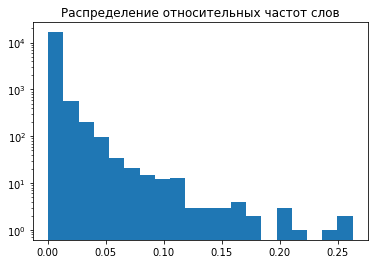

In [190]:
plt.hist(word_doc_freq, bins=20)
plt.title('Распределение относительных частот слов')
plt.yscale('log');

In [191]:
VECTORIZATION_MODE = 'tfidf'
# построение матрицы признаков по методу мешка слов
# функция vectorize_texts принимает на вход
#1. токенизированные список списков
#2. словарь
#3. вектор частоты токенизированны
#4. алгоритм взвешивания токенов по частоте mode - есть 4 алгорима - bin,tf,idf,tfidf
#5. флаг чтобы перемаштабировать флаг после взвешивания

train_vectors = vectorize_texts(train_tokenized, vocabulary, word_doc_freq, mode=VECTORIZATION_MODE)

print('Размерность матрицы признаков обучающей выборки', train_vectors.shape)
print()
print('Количество ненулевых элементов в обучающей выборке', train_vectors.nnz)
print('Процент заполненности матрицы признаков {:.2f}%'.format(train_vectors.nnz * 100 / (train_vectors.shape[0] * train_vectors.shape[1])))
print()

Размерность матрицы признаков обучающей выборки (9898, 17625)

Количество ненулевых элементов в обучающей выборке 672202
Процент заполненности матрицы признаков 0.39%



In [192]:
model_t = api.load('glove-twitter-100')

In [193]:
from gensim import utils

def get_vectors_gt100(row):
    '''
      word_doc_freq # частоты слов
      train_tokenized #сами слова
    '''
    vecs = [np.zeros(100)]
    for word in row:
        #print(row)
        try: 
            # если слово есть в нашем очищенном словаре
            # умножаем вектор на вес tfidf
            v = model_t[word] * word_doc_freq[vocabulary[word]] 
        except:
            v = np.zeros(100)
        vecs.append(v)
    return np.sum(np.array(vecs),axis=0)

In [194]:
train_gt100 = np.array([get_vectors_gt100(i) for i in train_tokenized])
val_gt100 = np.array([get_vectors_gt100(i) for i in val_tokenized])

In [196]:
model_t.most_similar(positive=['инвестор', 'рынок'], topn=1)

[('аналитик', 0.7176759243011475)]

In [197]:
clf = LogisticRegression(random_state=12, max_iter=500)
clf.fit(train_gt100, y_train)

pred = clf.predict(val_gt100)
accuracy_score(pred, y_val)

0.5414141414141415

In [199]:
import catboost as cb

np.random.seed(12)

params = dict(
    learning_rate=0.025,
    iterations=10000,
    reg_lambda=0.0005,
    colsample_bylevel=1.,
    max_bin=80,
    bagging_temperature=2,
    use_best_model=True,
    verbose=False,
    grow_policy='Depthwise',
    random_seed=12
)
model = cb.CatBoostClassifier(
    **params,
)

eval_set = cb.Pool(data=val_gt100, label=y_val)
model.fit(train_gt100, y_train, eval_set=eval_set, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [200]:
pred = model.predict(val_w2v)
accuracy_score(pred, y_val)

0.5361616161616162